## # Analysis of Bollywood Dataset

In [196]:
# Importing the Pandas and Matplotlib Libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset
df = pd.read_csv('bollywood.csv')

df["Genre"] = df["Genre"].str.strip()

print("bollywood Dataset is successfully uploded!")

bollywood Dataset is successfully uploded!


In [197]:
# To display the first 5 rows of the dataset
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [198]:
# To know the size of the dataset
df.shape

(149, 10)

### 1. How many records are present in the dataset?

In [199]:
df.shape[0]

# indexing with '0' gives us the total number of records in the dataset, and
# indexing with '1' gives us the total number of attributes in the dataset.

149

There are 149 total records in the given dataset.

### 2. How many movies got released in each genre? 

In [222]:
am = df.groupby('Genre')['MovieName'].count()
pd.DataFrame(am)

,MovieName
Genre,
Action,24
Comedy,36
Drama,35
Romance,25
Thriller,29


### Sort number of releases in each genre in descending order.

In [223]:
pd.DataFrame(am.sort_values(ascending=False))

,MovieName
Genre,
Comedy,36
Drama,35
Thriller,29
Romance,25
Action,24


##  3. Which genre had highest number of releases?


In [202]:
df['Genre'].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

#### The "Comedy" Genre had the highest number of releases.

### 4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [229]:
pd.crosstab(df['Genre'],df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


### 5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [230]:
# Creating a new column "ReleaseMonth" with the month of the movie's release time.
df['ReleaseMonth'] = pd.DatetimeIndex(df['Release Date']).month
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ReleaseMonth,ROI,ReleaseYear
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889,2014
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000,2013
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000,2014
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000,2013
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000,2014


In [231]:
x = pd.DataFrame(df['ReleaseMonth'].value_counts())
# or
#x = df.groupby('ReleaseMonth')['MovieName'].count()
#x.sort_values(ascending = False)
x

,ReleaseMonth
1,20
3,19
5,18
2,16
7,16
4,11
6,10
9,10
11,10
10,9


#### From above dataframe, maximum number of movie releases are seen in January.

## 6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [236]:
# 'y' is a dataframe of the records with budget of 25 crore or more.
y = df[df['Budget']>=25]
y.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ReleaseMonth,ROI,ReleaseYear
0,1,18-Apr-14,2 States,LW,Romance,36,104.0,8576361,26622,2527,4,1.888889,2014
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.6,3905050,8315,1373,9,-0.180000,2014
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.0,2435283,4326,647,1,0.212121,2013
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.0,2333067,2436,591,1,-0.129032,2014
10,11,28-Mar-14,Dishkiyaoon,N,Action,28,6.0,2397647,3308,465,3,-0.785714,2014


In [239]:
pd.DataFrame(y["ReleaseMonth"].value_counts())

,ReleaseMonth
2,9
1,8
3,7
8,7
7,6
11,6
6,5
9,5
4,4
10,4


#### Highest number of movies with budget greater than or equal to 25 crore are released in February.

## 7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [240]:
df["ROI"] = (df["BoxOfficeCollection"]-df['Budget'])/df["Budget"]
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ReleaseMonth,ROI,ReleaseYear
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,1.888889,2014
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,0.200000,2013
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,-0.600000,2014
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.950000,2013
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,-0.400000,2014


In [242]:
top = df[['MovieName','ROI']].sort_values(by="ROI",ascending=False)
top.head(10)

# Below are the top 10 movies with maximum ROI

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


## 8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times

In [211]:
s = df.groupby("ReleaseTime")["ROI"].mean()
s = pd.DataFrame(s.sort_values(ascending = False))
s

,ROI
ReleaseTime,
LW,1.127205
FS,0.973853
HS,0.850867
N,0.657722


#### Movies have high ROI if they get released on Long Weekends.

## 9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

0.6825165877731297

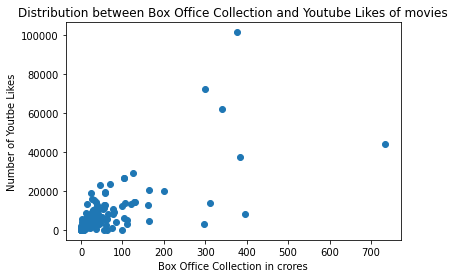

In [248]:
plt.scatter(df["BoxOfficeCollection"],df["YoutubeLikes"])
plt.title("Distribution between Box Office Collection and Youtube Likes of movies")
plt.xlabel("Box Office Collection in crores")
plt.ylabel("Number of Youtbe Likes")

df["BoxOfficeCollection"].corr(df["YoutubeLikes"])

### The correlation value has nearly reached 0.7 which means there is a moderate positive relationship between Box Office Collection and Youtube Likes.

## 10. Which genre of movies typically sees more YouTube likes? 

In [213]:
pd.DataFrame(df.groupby("Genre")["YoutubeLikes"].sum())

,YoutubeLikes
Genre,
Action,401873
Comedy,172250
Drama,279077
Romance,177241
Thriller,143312


#### Action movies received more likes in Youtube.

### Draw boxplots for each genre of movies to compare.

<AxesSubplot:title={'center':'YoutubeLikes'}, xlabel='Genre'>

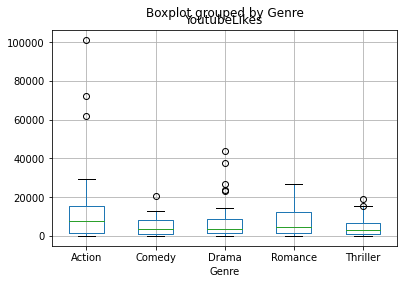

In [250]:
df.boxplot(column="YoutubeLikes",by="Genre")

## 11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


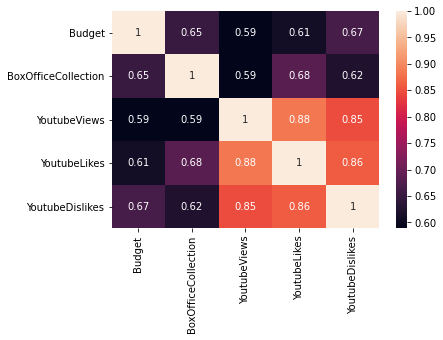

In [249]:
corr = df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()
sns.heatmap(corr,annot=True)
corr

#### From the above heatmap, we can say that the variables YoutubeViews and YoutubeLikes are highly Correlated.

## 12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

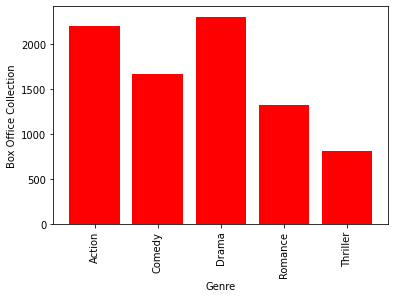

In [294]:
barg = df.groupby("Genre")["BoxOfficeCollection"].sum()
barg.plot.bar(color ='r',width =0.8)
plt.xlabel("Genre")
plt.ylabel("Box Office Collection")
plt.show()

## 13. Visualize the Budget and Box office collection based on Genre.

d:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Budget,BoxOfficeCollection
Genre,,
Action,1367,2200.34
Comedy,910,1660.14
Drama,847,2302.76
Romance,629,1321.03
Thriller,634,810.15


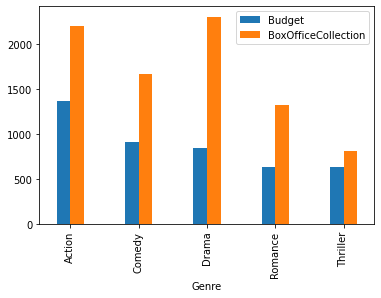

In [265]:
ab = df.groupby("Genre")["Budget","BoxOfficeCollection"].sum()
ab.plot.bar(width=0.4)
ab

## 14. Find the distribution of movie budget for every Genre.

<AxesSubplot:xlabel='Genre'>

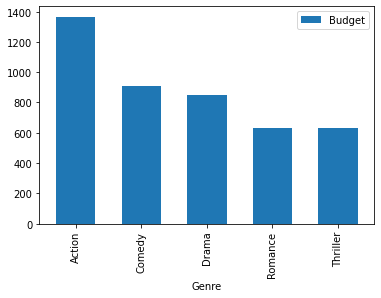

In [290]:
ab = pd.DataFrame(df.groupby("Genre")["Budget"].sum())
ab.plot.bar(width = 0.6)


## 15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [280]:
df["ReleaseYear"] = pd.DatetimeIndex(df["Release Date"]).year
yr =df.groupby("ReleaseYear")["MovieName"].count()
pd.DataFrame(yr)

,MovieName
ReleaseYear,
2013,67
2014,70
2015,12


#### No. of movies released in 2013 are 67, 2014 are 70 and 2015 are 12

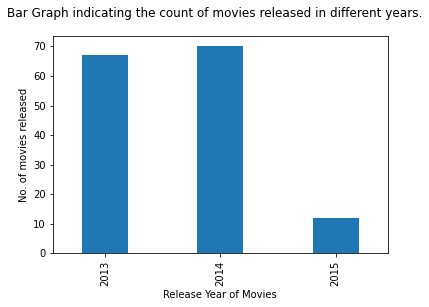

In [291]:
yr.plot.bar(width = 0.4)
plt.suptitle("Bar Graph indicating the count of movies released in different years.")
plt.xlabel("Release Year of Movies")
plt.ylabel("No. of movies released")
plt.show()